# Lab Assignment 1

Image recognition using deep networks



---



Importing required packages

In [3]:
from tensorflow import keras
import numpy as np

In [4]:
import matplotlib.pyplot as plt

### Exercise 1: Identifying handwritten numbers

Q1. List of applications where where automatic recognition of hand-written numbers would be useful:



*   Postal Services
*   Banking Services - Cheques
*   Storing info from hadnwritten forms digitally
*   Checking handwritten numbers on lottery tickets



In [5]:
# downloading MNIST and storing train and test tuples

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# confirming the dimensions of the data

print(x_train.shape)

(60000, 28, 28)


Data Preparation:

In [7]:
# flattening the training set

x_train_re = x_train.reshape(60000, 784)

In [8]:
# flattening the test set

x_test_re = x_test.reshape(10000, 784)

In [9]:
# rescaling the training set by dividing each variable by 255

x_train_re = x_train_re/255

In [10]:
# rescaling the test set by dividing each variable by 255

x_test_re = x_test_re/255

In [11]:
# converting the train set labels to new variables

y_train = keras.utils.to_categorical(y_train, 10)

In [12]:
# converting the test set labels to new variables

y_test = keras.utils.to_categorical(y_test, 10)

Model Definition:

In [13]:
# making the MLP model described in the assignment, using the code given to us

model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
# checking the resulting model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compiling the model as given in the assignment instructions

model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

Training and Evaluation:

Q2. Durations of epochs and the training performance history

In [16]:
# fitting the model as described in the assignment instructions

history = model.fit(x_train_re, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 4s 9ms/step - loss: 0.3903 - accuracy: 0.8865 - val_loss: 0.2898 - val_accuracy: 0.9187
Epoch 2/12
375/375 [==============================] - 4s 10ms/step - loss: 0.3070 - accuracy: 0.9140 - val_loss: 0.2893 - val_accuracy: 0.9213
Epoch 3/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2940 - accuracy: 0.9175 - val_loss: 0.2926 - val_accuracy: 0.9185
Epoch 4/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2868 - accuracy: 0.9200 - val_loss: 0.2832 - val_accuracy: 0.9225
Epoch 5/12
375/375 [==============================] - 4s 9ms/step - loss: 0.2808 - accuracy: 0.9215 - val_loss: 0.2740 - val_accuracy: 0.9271
Epoch 6/12
375/375 [==============================] - 4s 10ms/step - loss: 0.2774 - accuracy: 0.9228 - val_loss: 0.2865 - val_accuracy: 0.9211
Epoch 7/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2735 - accuracy: 0.9229 - val_loss: 0.2899 - val_accuracy: 0.9182
Epoc

Q3. Plotting the training history

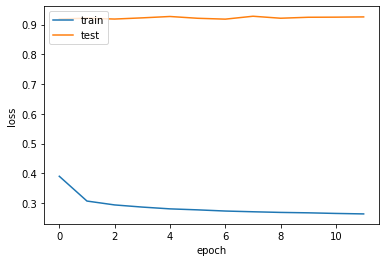

In [42]:
# plotting the loss of the training and validation sets

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

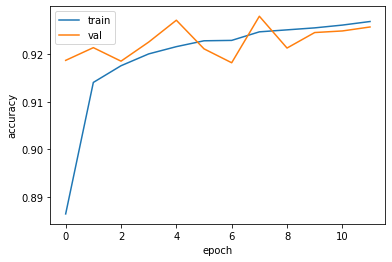

In [43]:
# plotting the accuracy of the training and validation sets

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

Q4. Discussion of the accuracy on the training and validation sets and how this progresses across epochs. What does this tell us about the generalizability of the model?



Q5. Evaluate the model performance on the test set

In [21]:
loss, accuracy = model.evaluate(x_test_re, y_test, verbose=0)

In [22]:
print(loss)

0.28237730264663696


In [23]:
print(accuracy)

0.9229999780654907


Q6. Is the accuracy sufficient for some uses of automatic hand-written digit classification?

This is very dependent on what it is being used for. With a 92% accuracy, the model is unlikely to store a phone number correctly (usually 10 digits). 

The 92% accuracy can lead to significant issues in the case of reading numbers off of bank cheques; this will result in individuals transferring incorrect amounts of money betweeen one another. 

The accuracy is likely to be sufficient in the case of reading a small amount of numbers, such as a house number or postal code. However with the large number of letters being sent, this is still likely to result in a large number of letters being sent to the incorrect address. 

Q7. How can linear activation of units limit the possible computations this model can perform?



In [24]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation = "relu"))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [26]:
history2 = model2.fit(x_train_re, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 4s 9ms/step - loss: 0.3189 - accuracy: 0.9115 - val_loss: 0.1802 - val_accuracy: 0.9471
Epoch 2/12
375/375 [==============================] - 3s 9ms/step - loss: 0.1454 - accuracy: 0.9573 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 3/12
375/375 [==============================] - 4s 11ms/step - loss: 0.0996 - accuracy: 0.9709 - val_loss: 0.1104 - val_accuracy: 0.9664
Epoch 4/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 5/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0863 - val_accuracy: 0.9747
Epoch 6/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.0864 - val_accuracy: 0.9758
Epoch 7/12
375/375 [==============================] - 3s 9ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0842 - val_accuracy: 0.9765
Epoch

Q8. Plotting the training history of the second model

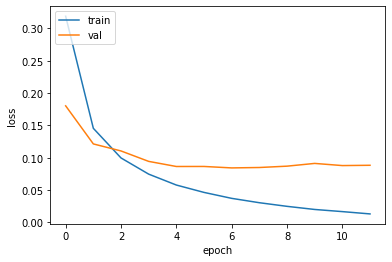

In [44]:
# plotting the loss of the training and validation sets

plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

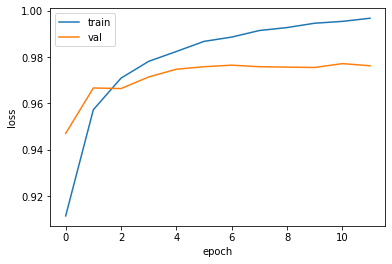

In [45]:
# plotting the accuracy of the training and validation sets

plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

Q9. Discussing the difference in training history between the two models. 

For the loss and accuracy, similar trends are observed between both models. Both models experience a steep drop in loss, followed by a more gradual decrease as the number of epochs increases. Both models also experience a sharp initial increase in accuracy, followed by a more gradual/slow increase as the number of epochs increases. 

The large observed difference between the two models is observed in the validation sets of the training history. The first model sees sharp peaks and troughs for both the validation loss and validation accuracy as the number of epochs increases. In the second model, similair trends are observed for the loss and accuracy of both the training and validation sets.

### Exercise 1, Part 2: Deep Convolutional Networks

Data Preparation

In [37]:
# reshaping x training set

x_train_dcn = x_train.reshape(60000, 28, 28, 1) / 255

In [38]:
# reshaping the x testing set

x_test_dcn = x_test.reshape(10000, 28, 28, 1) / 255

In [39]:
# using the code given in the tutorial to make the deep convolutional network

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [41]:
fit3 =  model.fit(x_train_dcn, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 118s 316ms/step - loss: 0.1098 - accuracy: 0.9673 - val_loss: 0.0741 - val_accuracy: 0.9774
Epoch 2/6
375/375 [==============================] - 126s 335ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 3/6
375/375 [==============================] - 137s 365ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0423 - val_accuracy: 0.9885
Epoch 4/6
375/375 [==============================] - 136s 362ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0431 - val_accuracy: 0.9872
Epoch 5/6
375/375 [==============================] - 134s 359ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0424 - val_accuracy: 0.9886
Epoch 6/6
375/375 [==============================] - 119s 318ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0451 - val_accuracy: 0.9883


Q10. Plotting the training history of the model.

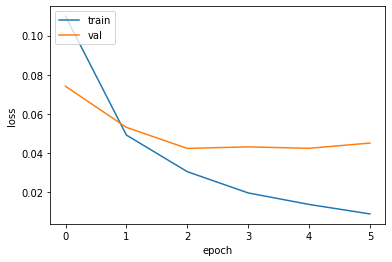

In [46]:
# plotting the loss of the training and validation sets

plt.plot(fit3.history["loss"])
plt.plot(fit3.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

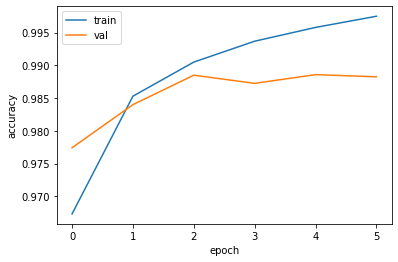

In [47]:
# plotting the accuracy of the training and validation sets

plt.plot(fit3.history["accuracy"])
plt.plot(fit3.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

Q11. Discussing the difference in the history of the training and validation sets.

The third model, which is the slightly deep convolutional network, results in increased accuracy and decreased loss compared to the previous two models. 

This would suggest that the model has a greater generalisability than the previous 2 models that were fitted earlier on in the assignment. 

Q12. Show results to supervisor and discuss the accuracy.

In [48]:
fit3.history['accuracy']

[0.9673125147819519,
 0.9852916598320007,
 0.9904999732971191,
 0.9936875104904175,
 0.9957916736602783,
 0.9975000023841858]

Q13. Is the accuracy satisfactory for uses of automatic handwritten digit classification?

These results would be satisfactory for real-life use of digit classification, as the model shows near perfect accuracy in classifying the written numbers. 

The model could be used for cheque reading, phone number reading, and adress/postal codes on letters. 

Fitting the model with an added dropout layer.

In [49]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.025))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dropout(rate=0.05))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [51]:
fit4 = model.fit(x_train_dcn, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 134s 358ms/step - loss: 0.9554 - accuracy: 0.8984 - val_loss: 0.0751 - val_accuracy: 0.9779
Epoch 2/6
375/375 [==============================] - 127s 340ms/step - loss: 0.8554 - accuracy: 0.9350 - val_loss: 0.0585 - val_accuracy: 0.9811
Epoch 3/6
375/375 [==============================] - 126s 337ms/step - loss: 0.8442 - accuracy: 0.9395 - val_loss: 0.0419 - val_accuracy: 0.9881
Epoch 4/6
375/375 [==============================] - 128s 342ms/step - loss: 0.8185 - accuracy: 0.9440 - val_loss: 0.0541 - val_accuracy: 0.9826
Epoch 5/6
375/375 [==============================] - 129s 343ms/step - loss: 0.8377 - accuracy: 0.9440 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 6/6
375/375 [==============================] - 129s 344ms/step - loss: 0.8288 - accuracy: 0.9461 - val_loss: 0.0471 - val_accuracy: 0.9877


Q14. Plotting the accuracy and loss of the models training and validation sets.

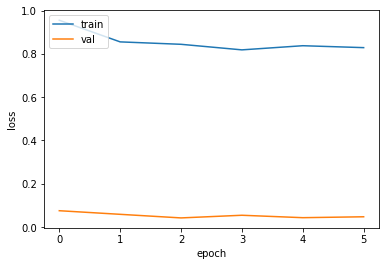

In [52]:
# plotting the loss of the training and validation sets

plt.plot(fit4.history["loss"])
plt.plot(fit4.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

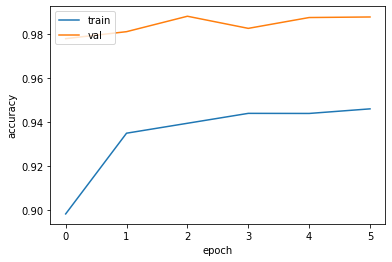

In [53]:
# plotting the accuracy of the training and validation sets

plt.plot(fit4.history["accuracy"])
plt.plot(fit4.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

In [54]:
fit4.history["accuracy"]

[0.898395836353302,
 0.9350208044052124,
 0.9395208358764648,
 0.9440208077430725,
 0.9439791440963745,
 0.9460625052452087]

Q15. Discussing the accuracy and loss of the training and validation sets of the fourth model.

The model without the dropout layer showed better performance than the one with the dropout layer. In addition to this, the convolutional network with the dropout layer also took a longer time to run. 

It also does not appear that the 4th model has a greater generalisability than the 3rd. 

### Exercise 2: Identifying objects from images

Data Preparation

In [55]:
# Downloading and loading the dataset using the code supplied in the assignemnt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [56]:
# preparing the test and train images

x_train = x_train / 255
x_test = x_test / 255

In [57]:
# converting the labels to categorical values

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# defining the model using the convolutional network with dropout from exercise 1 question 15 as a template

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.025))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dropout(rate=0.05))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')